In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [123]:
df = pd.read_csv('/kaggle/input/bank-marketing/bank-additional-full.csv',sep = ';')

In [38]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
df.shape

(41188, 21)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [43]:
df.value_counts()

age  job          marital  education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
36   retired      married  unknown              no       no       no    telephone  jul    thu          88        1         999    0         nonexistent   1.4          93.918          -42.7          4.966      5228.1       no     2
39   blue-collar  married  basic.6y             no       no       no    telephone  may    thu          124       1         999    0         nonexistent   1.1          93.994          -36.4          4.855      5191.0       no     2
27   technician   single   professional.course  no       no       no    cellular   jul    mon          331       2         999    0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       no     2
55   services     married  high.school          unknown  no       no    cellular 

In [44]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: xlabel='y'>

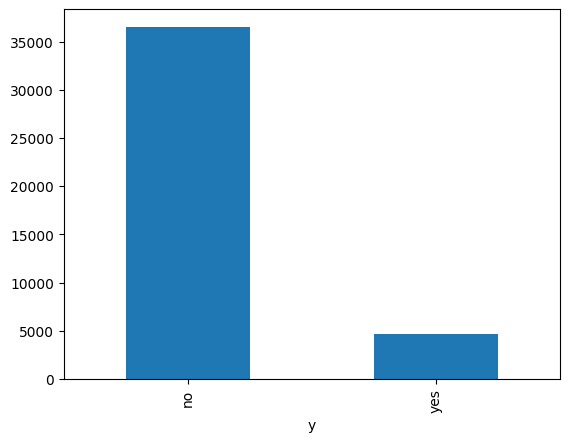

In [45]:
df['y'].value_counts().plot(kind = 'bar')

In [48]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


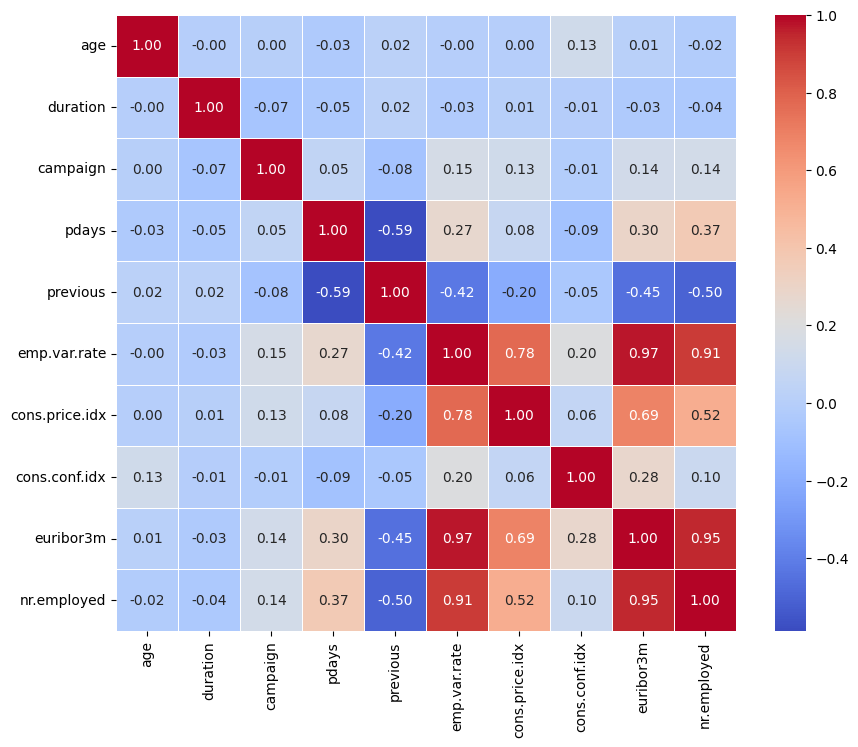

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [52]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
no,4136,22396,9948,68
yes,476,2532,1620,12


In [54]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.187296,254.312128
blue-collar,39.555760,264.542360
entrepreneur,41.723214,263.267857
housemaid,45.500000,250.454717
management,42.362859,257.058140
retired,62.027326,273.712209
self-employed,39.949331,264.142153
services,37.926430,258.398085
student,25.894857,283.683429


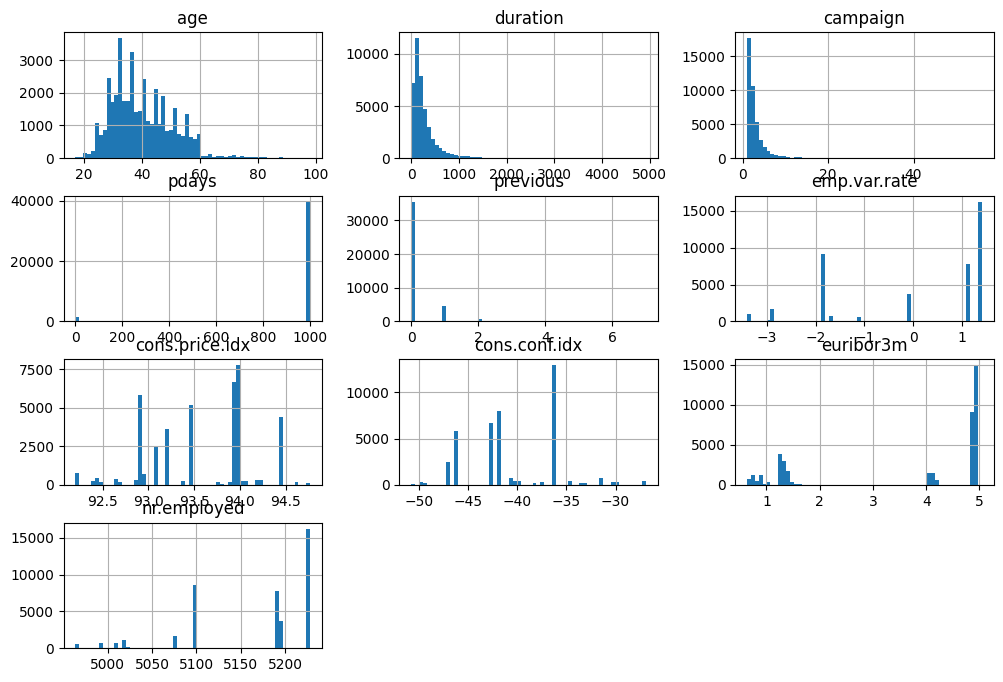

In [55]:
df.hist(bins=60, figsize=(12, 8))
plt.show()

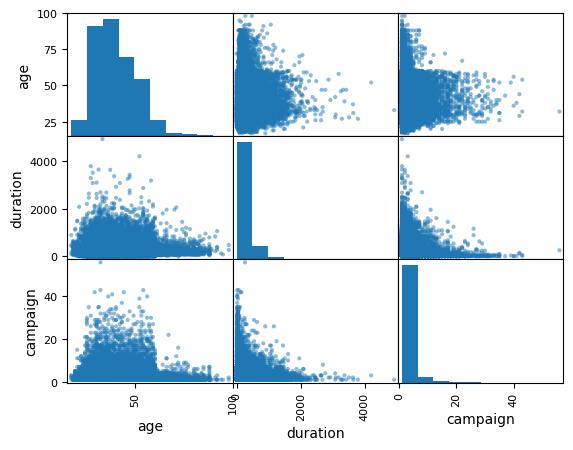

In [57]:
pd.plotting.scatter_matrix(df[["age", "duration", "campaign"]])
plt.show()

<Figure size 1000x800 with 0 Axes>

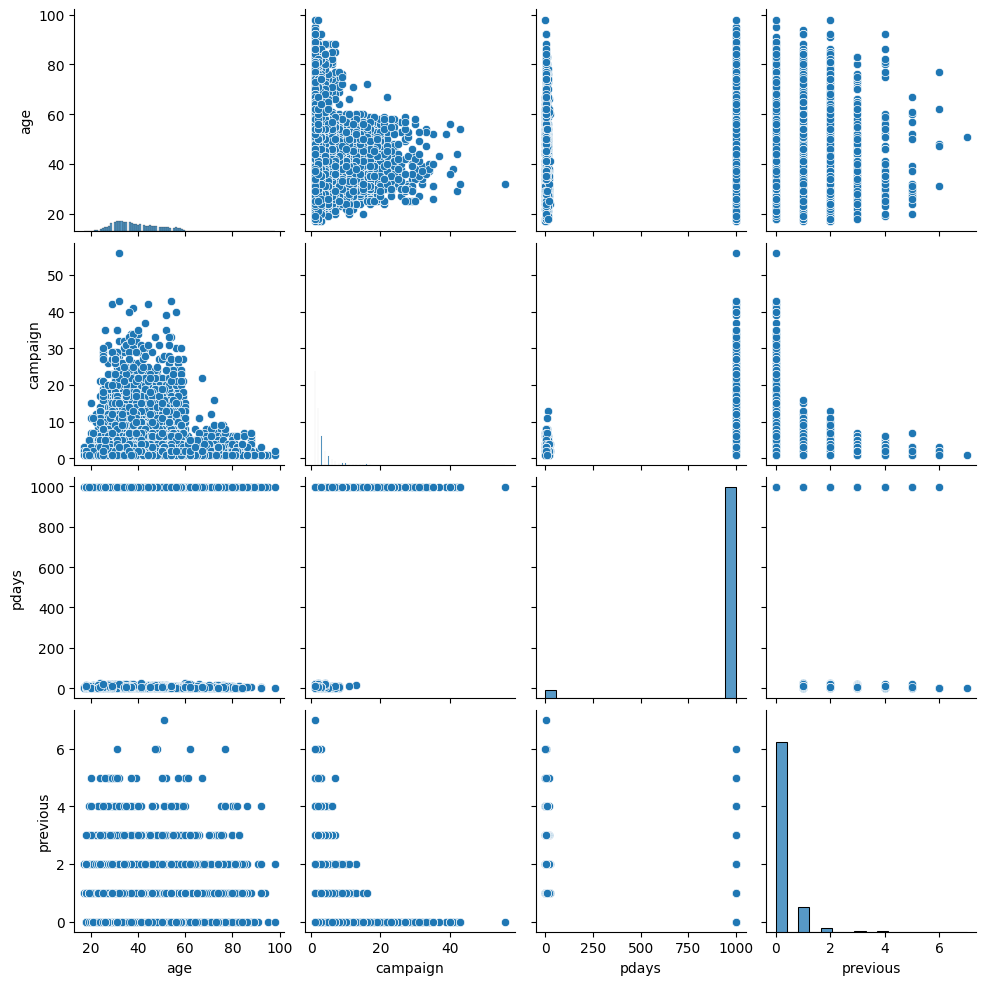

In [69]:
attributes=['age','campaign','pdays','previous','poutcome']
plt.figure(figsize=(10, 8))
sns.pairplot(df[attributes])
plt.show()

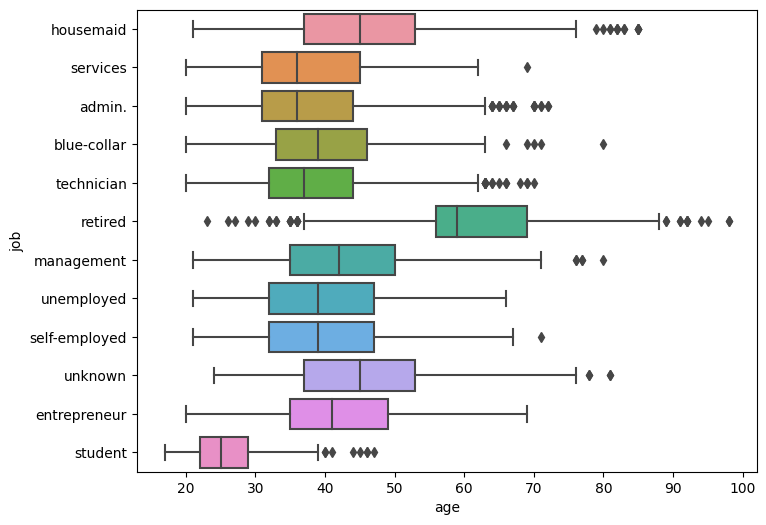

In [71]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='job', data=df)
plt.show()

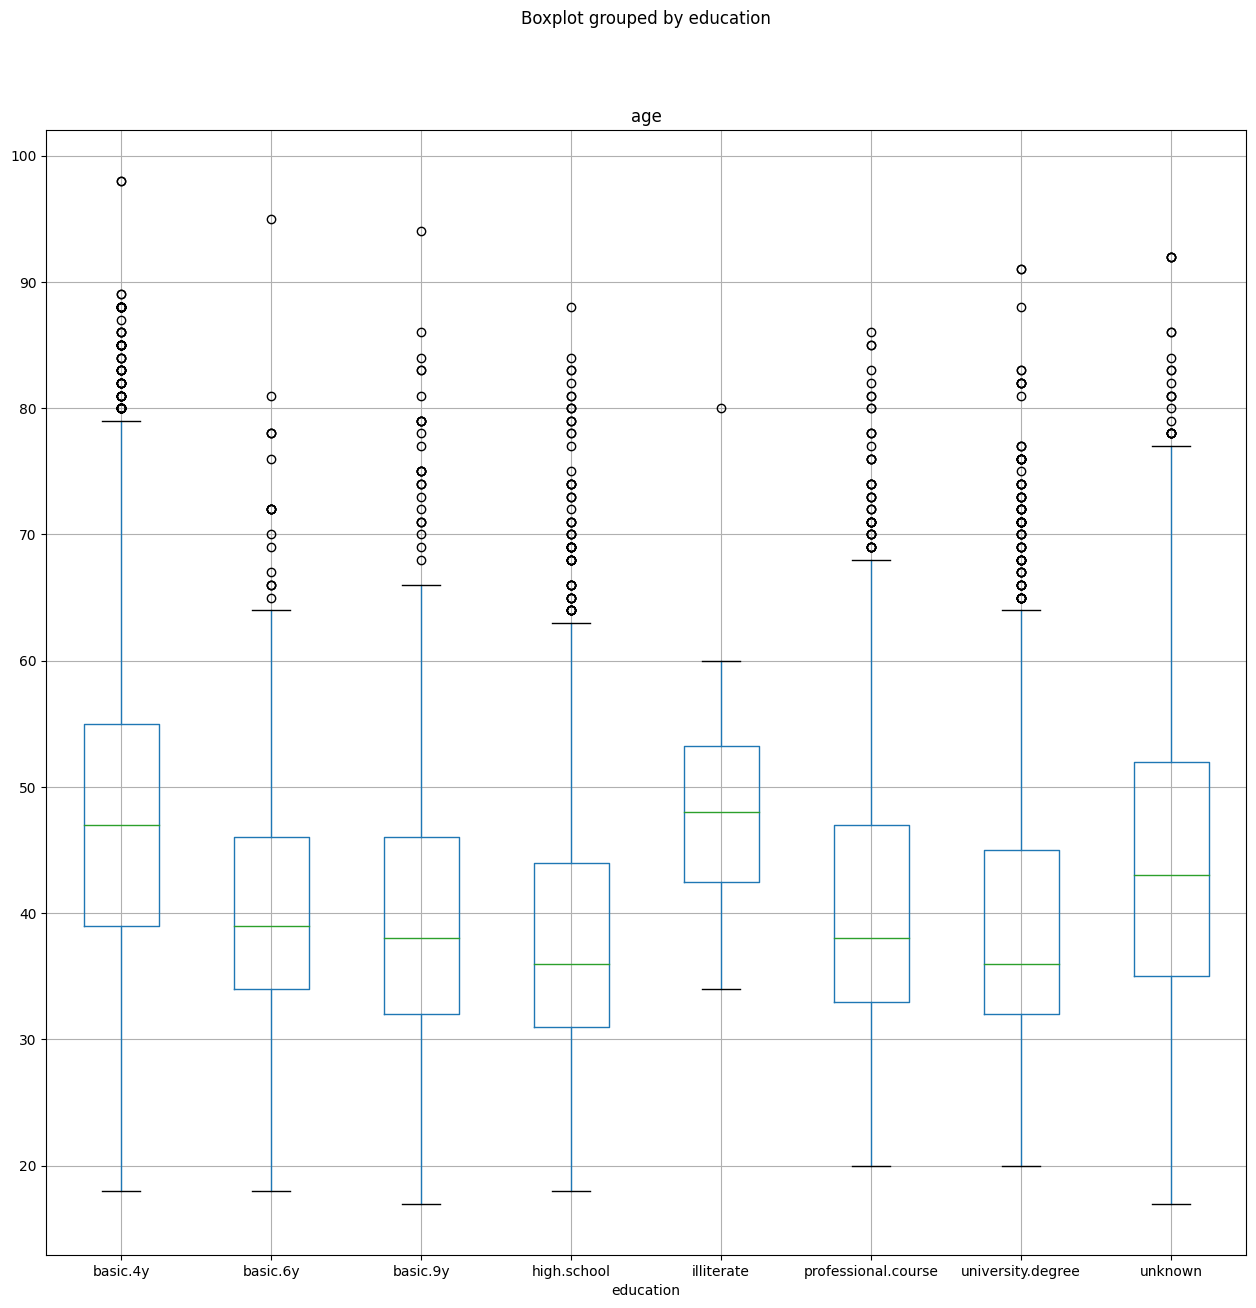

In [73]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

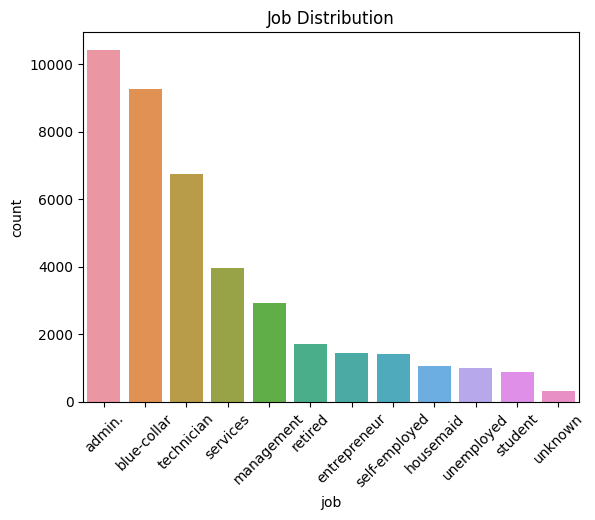

In [74]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

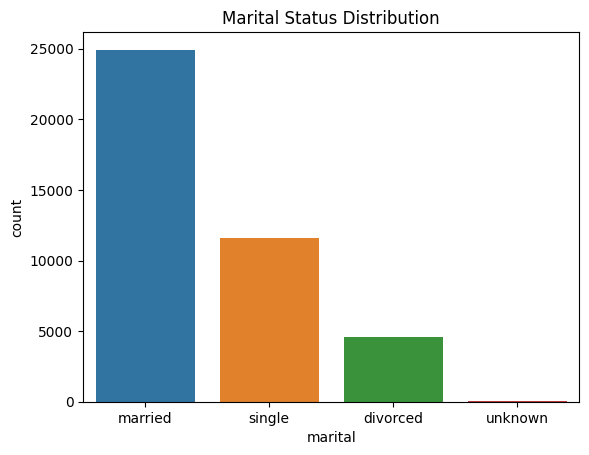

In [75]:
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')
plt.show()

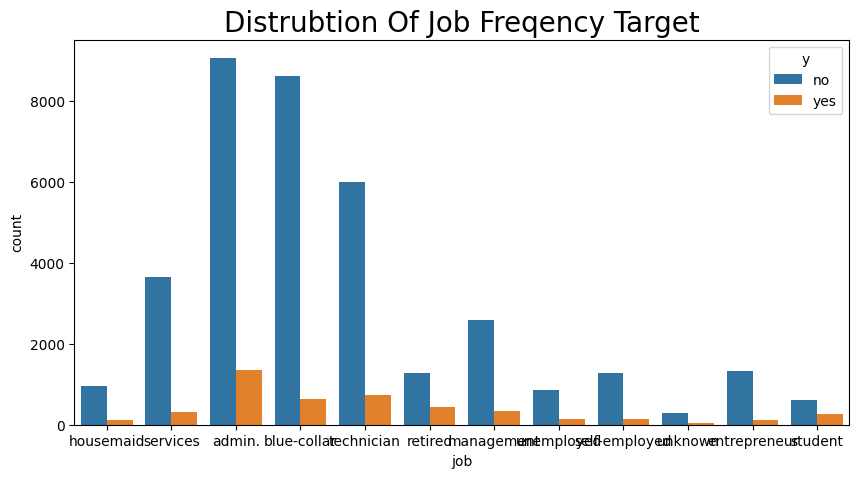

In [77]:
plt.figure(figsize=(10,5))
sns.countplot(x='job',hue='y',data=df)
plt.title('Distrubtion Of Job Freqency Target',fontsize=20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

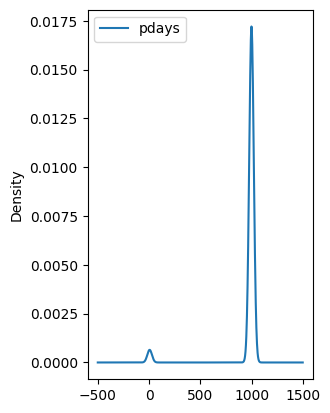

In [83]:
z=['pdays','poutcome']
df[z].plot(kind='density',subplots=True,layout=(1,2),sharex=False)
plt.show

In [130]:
categorical_data = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['float64' , 'int64']).columns

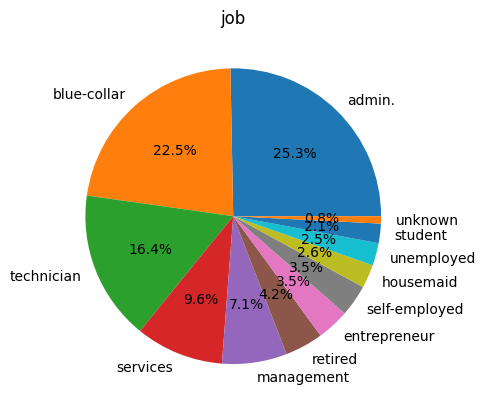

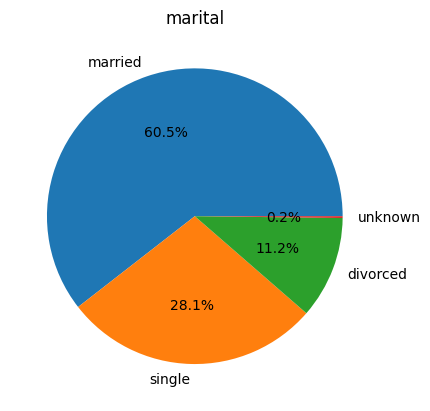

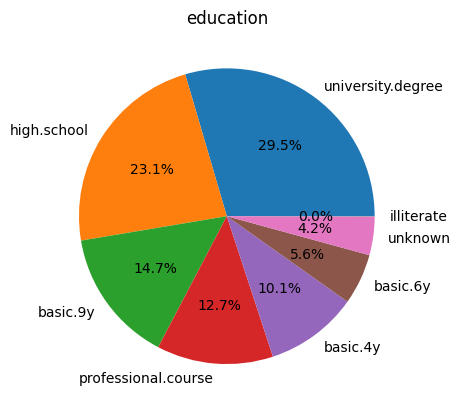

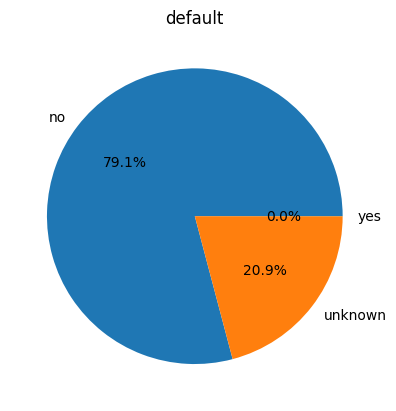

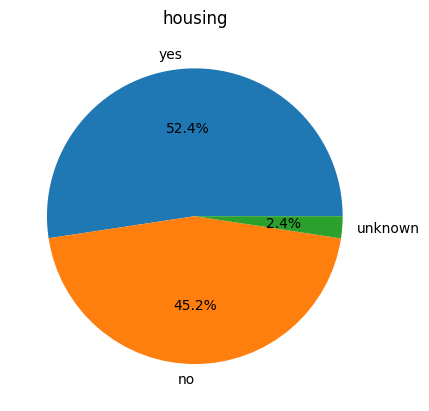

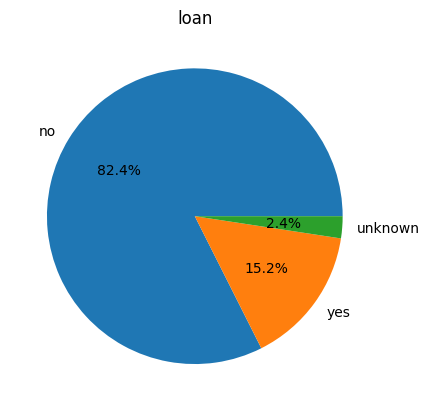

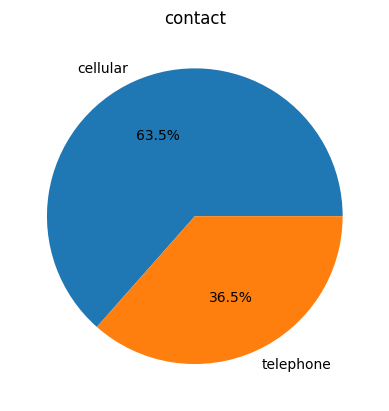

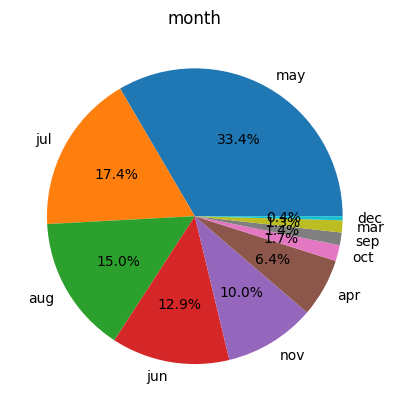

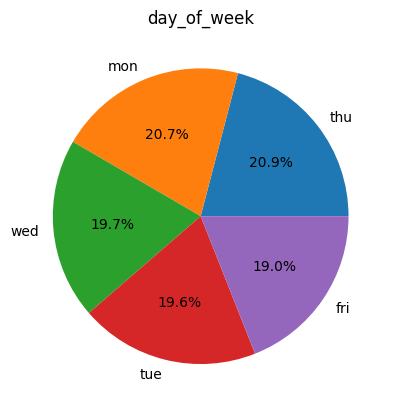

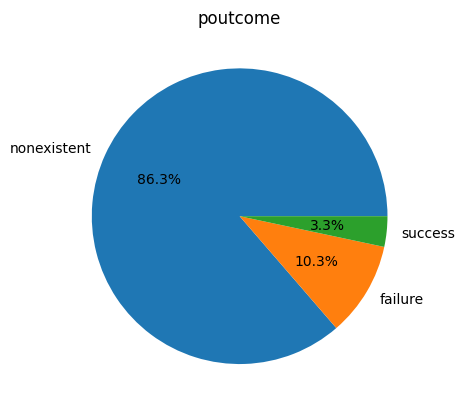

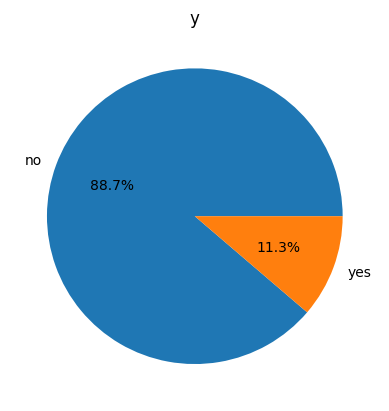

In [131]:
for column in categorical_data:
    perceage = (df[column].value_counts() * 100) / len(df)
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.pie(values, labels=labels, autopct='%1.1f%%')
    plt.title(column)  
    plt.show()

<Axes: >

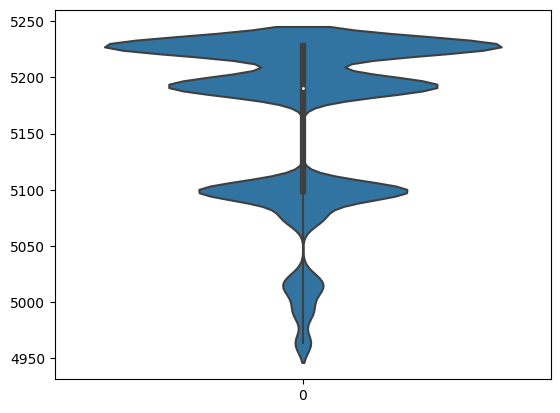

In [87]:
sns.violinplot(df['nr.employed'])

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [132]:

le = LabelEncoder()
for i in categorical_data:
    df[i] = le.fit_transform(df[i])
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [133]:
X = df.drop('y' ,axis = 1)
y = df['y']
key=X.keys()

In [134]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X , columns=key)
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.292025,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.481012,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.267225,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.708569,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


In [135]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=33)
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (32950, 20)
X_test shape (8238, 20)
y_train shape (32950,)
y_test shape (8238,)


In [136]:
model = Sequential()

model.add(Dense(128 , activation='relu' , input_dim = X.shape[1]))
model.add(Dense(32 , activation='relu' ))
model.add(Dense(1 , activation='sigmoid'))

In [137]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
model.compile(optimizer='sgd',loss='mean_squared_error', metrics=['accuracy'])

In [152]:
history = model.fit(X_train , y_train , epochs=20 , batch_size=64 , validation_data=(X_test, y_test))

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9382 - loss: 0.0445 - val_accuracy: 0.9093 - val_loss: 0.0620
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 0.0432 - val_accuracy: 0.9094 - val_loss: 0.0620
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.0434 - val_accuracy: 0.9097 - val_loss: 0.0620
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9412 - loss: 0.0429 - val_accuracy: 0.9091 - val_loss: 0.0621
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.0440 - val_accuracy: 0.9088 - val_loss: 0.0620
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9387 - loss: 0.0444 - val_accuracy: 0.9091 - val_loss: 0.0621
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9402 - loss: 0.0433 - val_accuracy: 0.9091 - val_loss: 0.0623
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9379 - loss: 0.0446 - val_accuracy: 0.

In [153]:
loss,acc=model.evaluate(X_test,y_test)
print('Test Loss :',loss)
print('Test accuracy :',acc)

258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9045 - loss: 0.0630
Test Loss : 0.062376510351896286
Test accuracy : 0.9087157249450684


In [154]:
historydf = pd.DataFrame(history.history)
historydf

,accuracy,loss,val_accuracy,val_loss
0,0.939241,0.043909,0.909323,0.062048
1,0.939666,0.043899,0.909444,0.061956
2,0.939484,0.043863,0.909687,0.061998
3,0.939423,0.043839,0.909080,0.062125
4,0.939211,0.043824,0.908837,0.061995
5,0.939454,0.043831,0.909080,0.062058
6,0.940182,0.043775,0.909080,0.062253
7,0.939484,0.043767,0.909323,0.062017
8,0.939605,0.043745,0.909080,0.062088
9,0.939393,0.043721,0.909323,0.062191


Text(0.5, 1.0, 'history')

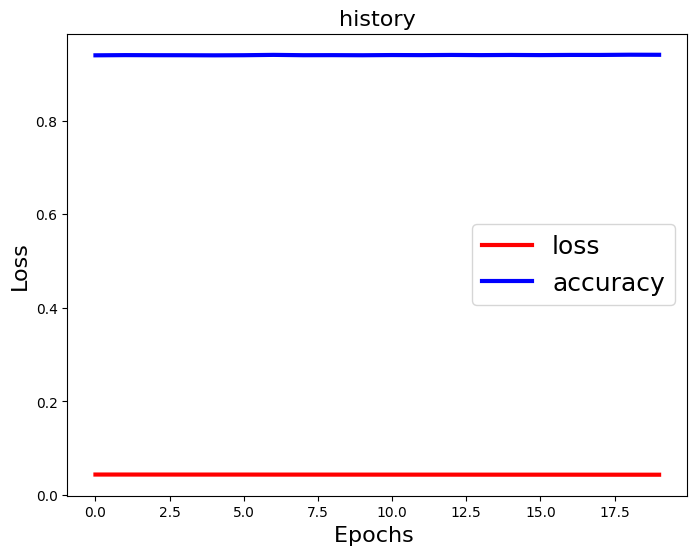

In [156]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['accuracy'],'b',linewidth=3.0)
plt.legend(['loss', 'accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('history',fontsize=16)

In [158]:
y_pred = model.predict(X_test.iloc[:100])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [159]:
y_pred

array([[7.1855104e-03],
       [4.9037087e-01],
       [8.8170100e-07],
       [7.3890081e-09],
       [2.5386102e-02],
       [2.0487732e-03],
       [6.8523431e-01],
       [5.4593622e-03],
       [2.6614634e-07],
       [1.0205558e-08],
       [4.4911373e-01],
       [1.0277937e-07],
       [2.2597758e-02],
       [5.1467917e-03],
       [1.3512319e-01],
       [1.8133251e-04],
       [3.2859067e-03],
       [1.8539949e-05],
       [1.7045798e-04],
       [1.6911888e-03],
       [4.4835787e-03],
       [1.5101174e-01],
       [8.4635074e-05],
       [2.4533043e-05],
       [1.3483517e-01],
       [3.0332889e-02],
       [7.1899354e-04],
       [5.7202703e-01],
       [5.1120333e-05],
       [6.9248050e-01],
       [8.0308274e-07],
       [4.0016425e-06],
       [4.7775680e-01],
       [4.0105076e-07],
       [8.1009381e-03],
       [9.0704007e-06],
       [1.5133866e-05],
       [3.7788185e-01],
       [3.5445258e-04],
       [3.5230562e-01],
       [2.6470408e-04],
       [1.632078

In [164]:
from sklearn.metrics import mean_squared_error
y_test100=y_test.iloc[:100]
mse = mean_squared_error(y_test100, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.07


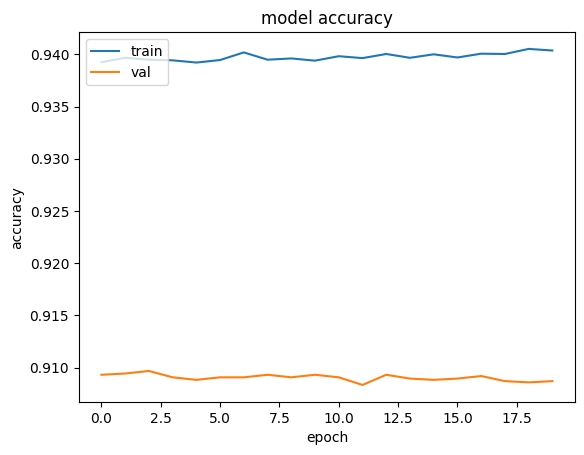

In [171]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

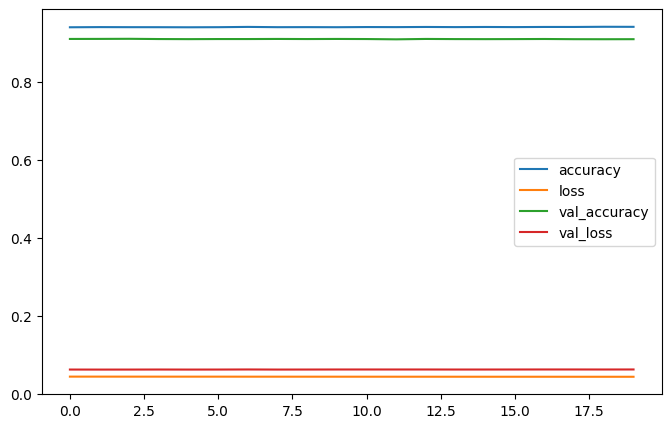

In [173]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

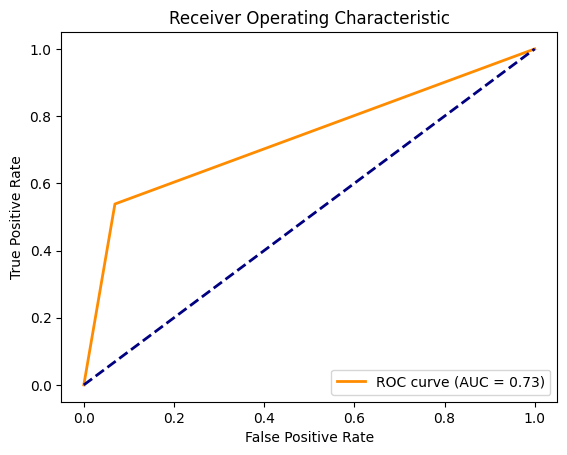

In [174]:
from sklearn.metrics import roc_curve, auc

# Assuming 'y_pred' contains predicted probabilities (e.g., output of sigmoid activation)
fpr, tpr, _ = roc_curve(y_test100, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


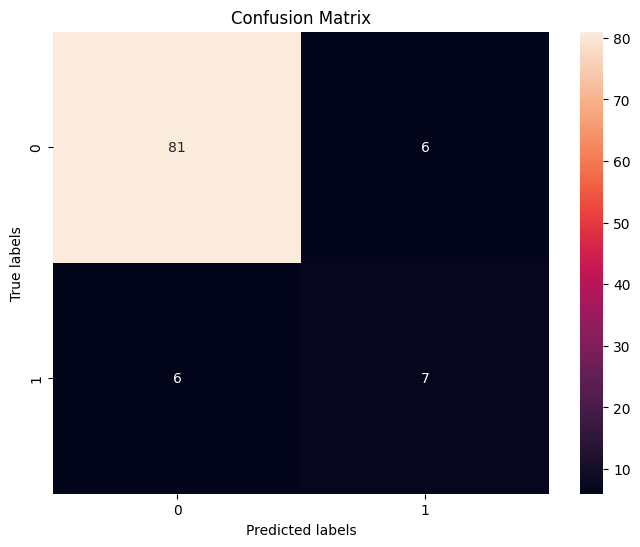

In [179]:
cm = confusion_matrix(y_test100, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

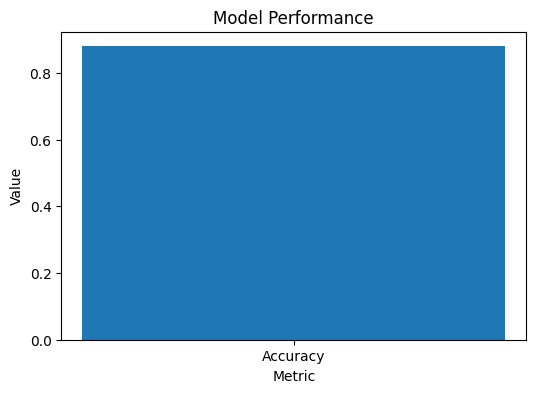

In [181]:
accuracy = accuracy_score(y_test100, y_pred)

plt.figure(figsize=(6, 4))
plt.bar(["Accuracy"], [accuracy])
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Model Performance")
plt.show()